<a href="https://colab.research.google.com/github/saurabhmishra1806/Projects-/blob/master/MovieLens_100k_Recommendationx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd


Mounted at /content/gdrive


In [13]:

import matplotlib as mpl

from matplotlib import pyplot as plt
import numpy as np

col_names = ["user_id", "item_id", "rating", "timestamp"]
data = pd.read_table("/content/gdrive/My Drive/ml-100k/u.data", names=col_names)
data = data.drop("timestamp", 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


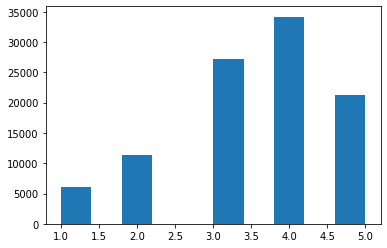

In [4]:
plt.hist(data["rating"])
plt.show()

In [5]:
Number_Ratings = len(data)
Number_Users = len(np.unique(data["user_id"]))
Number_Item = len(np.unique(data["item_id"]))
sparsity = Number_Ratings/(Number_Users*Number_Item)
sparsity

0.06304669364224531

In [6]:
data = data[data["user_id"]>sparsity]
data.head()
data.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

In [22]:
!pip install mxnet

     |████████████████████████████████| 55.0MB 73kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [31]:
import turicreate as tc
sf = tc.SFrame(train)
m = tc.popularity_recommender.create(sf, target = "rating")
recs = m.recommend()
recs

Preparing data set.

Data has 70000 observations with 943 users and 1629 items.

Data prepared in: 0.075808s

70000 observations to process; with 1629 unique items.

user_id,item_id,score,rank
379,1599,5.0,1
379,1368,5.0,2
379,1201,5.0,3
379,1189,5.0,4
379,1653,5.0,5
379,1500,5.0,6
379,1358,5.0,7
379,1536,5.0,8
379,1293,5.0,9
379,814,5.0,10


In [47]:
m1 = tc.ranking_factorization_recommender.create(sf, target = "rating")
recs1 = m1.recommend()
recs1

Preparing data set.

Data has 70000 observations with 943 users and 1629 items.

Data prepared in: 0.077836s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 70000 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.84257                                  |

| 5       | 0.0488281         | 1.8518                                   |

| 6       | 0.0244141         | 1.89468                                  |

| 7       | 0.012207          | 1.96272                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.84257                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 124us        | 2.49461           | 1.12797               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 87.893ms     | 2.13646           | 1.13845               | 0.0976562   |

| 2       | 168.218ms    | 1.90062           | 1.07917               | 0.0580668   |

| 3       | 235.123ms    | 1.73125           | 1.0158                | 0.042841    |

| 4       | 308.173ms    | 1.58303           | 0.959185              | 0.0345267   |

| 5       | 382.47ms     | 1.45896           | 0.906509              | 0.029206    |

| 10      | 741.791ms    | 1.03298           | 0.713064              | 0.017366    |

| 25      | 1.82s        | 0.799897          | 0.595445              | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.777166

Final training RMSE: 0.538173

user_id,item_id,score,rank
379,318,5.616670304693486,1
379,483,5.553944522299076,2
379,209,5.113952809728886,3
379,258,5.002330953039433,4
379,132,4.972401315130497,5
379,484,4.965424233831669,6
379,8,4.943450147070195,7
379,135,4.863627129949833,8
379,428,4.833234959997441,9
379,423,4.808803731359745,10


In [51]:
trains, vals = tc.recommender.util.random_split_by_user(sf)
m2 = tc.ranking_factorization_recommender.create(trains, target = "rating", ranking_regularization=1e-3, unobserved_rating_value=1)
recs2 = m2.recommend()
recs2

Preparing data set.

Data has 56016 observations with 943 users and 1591 items.

Data prepared in: 0.053932s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.001    |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| 1        |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 56016 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 0.693732                                 |

| 5       | 0.0488281         | 0.720726                                 |

| 6       | 0.0244141         | 0.774327                                 |

| 7       | 0.012207          | 0.85205                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.693732                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 169us        | 1.28487           | 1.1307                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 72.419ms     | 1.09469           | 1.04255               | 0.0976562   |

| 2       | 140.109ms    | 0.963921          | 0.977663              | 0.0580668   |

| 3       | 197.213ms    | 0.892663          | 0.94055               | 0.042841    |

| 4       | 259.575ms    | 0.84168           | 0.913033              | 0.0345267   |

| 5       | 319.757ms    | 0.784533          | 0.881188              | 0.029206    |

| 10      | 601.672ms    | 0.463802          | 0.67488               | 0.017366    |

| 25      | 1.48s        | 0.137823          | 0.358849              | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.116675

Final training RMSE: 0.327627

user_id,item_id,score,rank
379,474,5.762578835594356,1
379,632,5.674460997688472,2
379,315,5.5629881526109575,3
379,193,5.5050870085832475,4
379,313,5.451219430076778,5
379,14,5.417641034233272,6
379,887,5.340629568206966,7
379,958,5.333243718254268,8
379,591,5.3246718550798295,9
379,258,5.188235750305354,10


In [54]:
eval = m2.evaluate(vals)
eval


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.06510138740661682  | 0.004957782399062463 |
|   2    |  0.0581643543223052  | 0.009166776280572499 |
|   3    | 0.05585200996086806  | 0.013055295040645917 |
|   4    | 0.051494130202774824 | 0.01564241351872738  |
|   5    | 0.05016008537886876  | 0.018730858737131914 |
|   6    | 0.049092849519743846 | 0.02134476220423466  |
|   7    | 0.046653453270315635 | 0.023838387957116854 |
|   8    | 0.04602454642475987  |  0.0260323370842688  |
|   9    | 0.044586742558994454 |  0.0281541091269986  |
|   10   | 0.04397011739594452  | 0.03009227344119074  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 1.124384439085552

Per User RMSE (best)
+---------+----------------------+-------+
| user_id |         rmse      

{'precision_recall_by_user': Columns:
 	user_id	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 16866
 
 Data:
 +---------+--------+---------------------+---------------------+-------+
 | user_id | cutoff |      precision      |        recall       | count |
 +---------+--------+---------------------+---------------------+-------+
 |   379   |   1    |         1.0         | 0.03571428571428571 |   28  |
 |   379   |   2    |         0.5         | 0.03571428571428571 |   28  |
 |   379   |   3    |  0.3333333333333333 | 0.03571428571428571 |   28  |
 |   379   |   4    |         0.25        | 0.03571428571428571 |   28  |
 |   379   |   5    |         0.2         | 0.03571428571428571 |   28  |
 |   379   |   6    | 0.16666666666666666 | 0.03571428571428571 |   28  |
 |   379   |   7    | 0.14285714285714285 | 0.03571428571428571 |   28  |
 |   379   |   8    |        0.125        | 0.03571428571428571 |   28  |
 |   379   |   9    |  0.1111111111111111 | 0.035714

In [53]:
m2.evaluate_precision_recall(vals)

{'precision_recall_by_user': Columns:
 	user_id	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 16866
 
 Data:
 +---------+--------+---------------------+---------------------+-------+
 | user_id | cutoff |      precision      |        recall       | count |
 +---------+--------+---------------------+---------------------+-------+
 |   379   |   1    |         1.0         | 0.03571428571428571 |   28  |
 |   379   |   2    |         0.5         | 0.03571428571428571 |   28  |
 |   379   |   3    |  0.3333333333333333 | 0.03571428571428571 |   28  |
 |   379   |   4    |         0.25        | 0.03571428571428571 |   28  |
 |   379   |   5    |         0.2         | 0.03571428571428571 |   28  |
 |   379   |   6    | 0.16666666666666666 | 0.03571428571428571 |   28  |
 |   379   |   7    | 0.14285714285714285 | 0.03571428571428571 |   28  |
 |   379   |   8    |        0.125        | 0.03571428571428571 |   28  |
 |   379   |   9    |  0.1111111111111111 | 0.035714

In [60]:
m3 = tc.item_similarity_recommender.create(sf, target = "rating")
recs3 = m3.recommend()
recs3


Preparing data set.

Data has 70000 observations with 943 users and 1629 items.

Data prepared in: 0.080287s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 16.548ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 21.896ms                            | 0                | 3               |

| 160.853ms                           | 100              | 1629            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.180457s

user_id,item_id,score,rank
379,204,0.14947468564458136,1
379,423,0.14095071023398073,2
379,89,0.12683362725877415,3
379,82,0.12105320230887755,4
379,195,0.10577594711832757,5
379,180,0.09867499910131858,6
379,96,0.09864344344521961,7
379,265,0.0951758757994993,8
379,215,0.09018456196262889,9
379,4,0.08968762716237647,10


In [76]:
m3.evaluate_precision_recall(tc.SFrame(test))

{'precision_recall_by_user': Columns:
 	user_id	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 16974
 
 Data:
 +---------+--------+--------------------+---------------------+-------+
 | user_id | cutoff |     precision      |        recall       | count |
 +---------+--------+--------------------+---------------------+-------+
 |   379   |   1    |        1.0         | 0.01694915254237288 |   59  |
 |   379   |   2    |        0.5         | 0.01694915254237288 |   59  |
 |   379   |   3    | 0.6666666666666666 | 0.03389830508474576 |   59  |
 |   379   |   4    |        0.75        | 0.05084745762711865 |   59  |
 |   379   |   5    |        0.8         | 0.06779661016949153 |   59  |
 |   379   |   6    | 0.6666666666666666 | 0.06779661016949153 |   59  |
 |   379   |   7    | 0.7142857142857143 |  0.0847457627118644 |   59  |
 |   379   |   8    |        0.75        |  0.1016949152542373 |   59  |
 |   379   |   9    | 0.6666666666666666 |  0.1016949152542373 

In [72]:
m3.recommend()

user_id,item_id,score,rank
379,204,0.14947468564458136,1
379,423,0.14095071023398073,2
379,89,0.12683362725877415,3
379,82,0.12105320230887755,4
379,195,0.10577594711832757,5
379,180,0.09867499910131858,6
379,96,0.09864344344521961,7
379,265,0.0951758757994993,8
379,215,0.09018456196262889,9
379,4,0.08968762716237647,10


In [69]:
m2.recommend(k=20)

user_id,item_id,score,rank
379,474,5.762578835594356,1
379,632,5.674460997688472,2
379,315,5.5629881526109575,3
379,193,5.5050870085832475,4
379,313,5.451219430076778,5
379,14,5.417641034233272,6
379,887,5.340629568206966,7
379,958,5.333243718254268,8
379,591,5.3246718550798295,9
379,258,5.188235750305354,10


In [73]:
m1.recommend()

user_id,item_id,score,rank
379,318,5.616670304693486,1
379,483,5.553944522299076,2
379,209,5.113952809728886,3
379,258,5.002330953039433,4
379,132,4.972401315130497,5
379,484,4.965424233831669,6
379,8,4.943450147070195,7
379,135,4.863627129949833,8
379,428,4.833234959997441,9
379,423,4.808803731359745,10


In [77]:
m3.predict(tc.SFrame(test))

dtype: float
Rows: 30000
[0.0046432683790536755, 0.0034673959016799927, 0.00345308662847031, 0.0, 0.000928708700218586, 0.06983070467647753, 0.01925428460041682, 0.006899387696210076, 0.05725468507665672, 0.0, 0.009782874813446632, 0.08189367466285581, 0.005272649043847707, 0.12186387822597841, 0.0025844647334172174, 0.004587375803997642, 0.011295929551124573, 0.010508904585967193, 0.05221099024865686, 0.022875096510957788, 0.014145980278650919, 0.04228697375100874, 0.05907440558075905, 0.00039361218209208745, 0.044645242201976285, 0.02049258113962359, 0.0784767213141083, 0.08374872780763186, 0.015004731927599225, 0.002104619444718007, 0.10102045617691457, 0.010033089627501785, 0.10946471304506869, 0.009625174150876473, 0.007931087931541547, 0.0, 0.004517731100025743, 0.04697696419729703, 0.012076520652913335, 0.012251070477147517, 0.03310525417327881, 0.05801305384703086, 0.03252031691640401, 0.006928899884223938, 0.03380777997275194, 0.009798932366254853, 0.014631660138407061, 0.0834

In [79]:
m3.evaluate_rmse(tc.SFrame(test), target="rating")

{'rmse_by_item': Columns:
 	item_id	int
 	rmse	float
 	count	int
 
 Rows: 1498
 
 Data:
 +---------+--------------------+-------+
 | item_id |        rmse        | count |
 +---------+--------------------+-------+
 |   118   | 3.516044511900464  |   89  |
 |   660   | 3.585963631644951  |   49  |
 |   1379  | 2.5124162273264536 |   3   |
 |   699   |  4.01359094154957  |   38  |
 |   567   |  4.02298920237411  |   4   |
 |   773   | 2.9488566994202086 |   7   |
 |   1029  | 1.7307796156112423 |   4   |
 |   1504  |        3.0         |   1   |
 |   435   | 3.9691643672059076 |   64  |
 |   1289  | 2.4997686969884256 |   4   |
 +---------+--------------------+-------+
 [1498 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_user': Columns:
 	user_id	int
 	rmse	float
 	count	int
 
 Rows: 943
 
 Data:
 +---------+--------------------+-------+
 | user_id |        rmse        | count

In [85]:
m2.predict(tc.SFrame(test))


dtype: float
Rows: 30000
[4.010892836260497, 2.3264920542713994, 3.3080971221205586, 2.3135845529612893, 4.780046624946296, 4.66347189794749, 3.073463169741332, 3.5562518368241185, 3.124994752812087, 2.5012852082726353, 3.8838328513082856, 2.9998014102455968, 3.1887782047268742, 3.1588311920639867, 3.111481402884125, 4.018185192602575, 5.215678615379035, 1.7687996457096928, 3.948378307628333, 4.081261362763941, 4.074283255147636, 5.359712017583549, 4.356428874540031, 1.7949623594757909, 3.316753102349937, 4.267834139871299, 4.289978755521476, 4.029596959124207, 1.9117567370411748, 3.659387139486968, 4.758740080403983, 2.951472489046752, 4.378324700402915, 2.1630695740458363, 4.2368113229748605, 3.262016622233092, 3.135273886727988, 5.219506217050254, 2.9383862743851537, 3.418209416675269, 3.266960719483792, 3.5859282145974034, 1.5861529837128514, 4.202645216486305, 3.636662652599513, 4.6908227930542825, 2.5166233311173314, 0.8562922606942052, 3.392361303674876, 2.608532756916135, 3.538

In [86]:
m2.evaluate_precision_recall(tc.SFrame(test))

{'precision_recall_by_user': Columns:
 	user_id	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 16974
 
 Data:
 +---------+--------+---------------------+---------------------+-------+
 | user_id | cutoff |      precision      |        recall       | count |
 +---------+--------+---------------------+---------------------+-------+
 |   379   |   1    |         0.0         |         0.0         |   59  |
 |   379   |   2    |         0.0         |         0.0         |   59  |
 |   379   |   3    |         0.0         |         0.0         |   59  |
 |   379   |   4    |         0.25        | 0.01694915254237288 |   59  |
 |   379   |   5    |         0.2         | 0.01694915254237288 |   59  |
 |   379   |   6    | 0.16666666666666666 | 0.01694915254237288 |   59  |
 |   379   |   7    | 0.14285714285714285 | 0.01694915254237288 |   59  |
 |   379   |   8    |        0.125        | 0.01694915254237288 |   59  |
 |   379   |   9    |  0.1111111111111111 | 0.016949

In [93]:
tc.recommender.util.compare_models(sf, [m1,m2])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]


Overall RMSE: 0.5381727320636759

Per User RMSE (best)
+---------+---------------------+-------+
| user_id |         rmse        | count |
+---------+---------------------+-------+
|   866   | 0.11366102202762557 |   10  |
+---------+---------------------+-------+
[1 rows x 3 columns]


Per User RMSE (worst)

[{'precision_recall_by_user': Columns:
  	user_id	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 16974
  
  Data:
  +---------+--------+-----------+--------+-------+
  | user_id | cutoff | precision | recall | count |
  +---------+--------+-----------+--------+-------+
  |   379   |   1    |    0.0    |  0.0   |  137  |
  |   379   |   2    |    0.0    |  0.0   |  137  |
  |   379   |   3    |    0.0    |  0.0   |  137  |
  |   379   |   4    |    0.0    |  0.0   |  137  |
  |   379   |   5    |    0.0    |  0.0   |  137  |
  |   379   |   6    |    0.0    |  0.0   |  137  |
  |   379   |   7    |    0.0    |  0.0   |  137  |
  |   379   |   8    |    0.0    |  0.0   |  137  |
  |   379   |   9    |    0.0    |  0.0   |  137  |
  |   379   |   10   |    0.0    |  0.0   |  137  |
  +---------+--------+-----------+--------+-------+
  [16974 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) t

In [94]:
tc.recommender.util.compare_models(tc.SFrame(test), [m2,m3], metric="precision_recall")

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+---------------------+----------------------+
| cutoff |    mean_precision   |     mean_recall      |
+--------+---------------------+----------------------+
|   1    | 0.13785790031813366 | 0.004108964877216073 |
|   2    | 0.12407211028632031 | 0.007603718710600873 |
|   3    | 0.11770943796394484 | 0.010519280128935212 |
|   4    | 0.11505832449628843 | 0.013704317229494082 |
|   5    | 0.11155885471898211 | 0.017242942336961515 |
|   6    | 0.10975609756097554 | 0.019985667984086408 |
|   7    |  0.1074079684896228 | 0.023054011151347902 |
|   8    | 0.10432131495227996 | 0.02522680073861175  |
|   9    | 0.10298102981029814 | 0.028334241885361475 |
|   10   | 0.10031813361611883 | 0.030522922811299123 |
+--------+---------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+---------------------+---

[{'precision_recall_by_user': Columns:
  	user_id	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 16974
  
  Data:
  +---------+--------+---------------------+---------------------+-------+
  | user_id | cutoff |      precision      |        recall       | count |
  +---------+--------+---------------------+---------------------+-------+
  |   379   |   1    |         0.0         |         0.0         |   59  |
  |   379   |   2    |         0.0         |         0.0         |   59  |
  |   379   |   3    |         0.0         |         0.0         |   59  |
  |   379   |   4    |         0.25        | 0.01694915254237288 |   59  |
  |   379   |   5    |         0.2         | 0.01694915254237288 |   59  |
  |   379   |   6    | 0.16666666666666666 | 0.01694915254237288 |   59  |
  |   379   |   7    | 0.14285714285714285 | 0.01694915254237288 |   59  |
  |   379   |   8    |        0.125        | 0.01694915254237288 |   59  |
  |   379   |   9    |  0.11111

In [95]:
tc.recommender.util.compare_models(tc.SFrame(test), [m2,m3], exclude_known_for_precision_recall=False)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+---------------------+----------------------+
| cutoff |    mean_precision   |     mean_recall      |
+--------+---------------------+----------------------+
|   1    | 0.12937433722163313 | 0.003880245683571153 |
|   2    | 0.11081654294803817 | 0.006744592918347524 |
|   3    |  0.1074584658890067 | 0.009622040993028174 |
|   4    | 0.10259809119830325 | 0.012105404940567943 |
|   5    | 0.09777306468716866 | 0.015058075975052555 |
|   6    | 0.09579356663131845 | 0.018114206389600717 |
|   7    | 0.09225874867444328 | 0.020548131323975653 |
|   8    | 0.09093319194061507 | 0.022950754232374734 |
|   9    | 0.08872393071756807 | 0.025188291986414726 |
|   10   | 0.08632025450689287 | 0.027201296453866975 |
+--------+---------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 1.1251952042752673

Per User RMSE (best)
+---------+---------------------+-------+
| user_id |     

[{'precision_recall_by_user': Columns:
  	user_id	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 16974
  
  Data:
  +---------+--------+---------------------+---------------------+-------+
  | user_id | cutoff |      precision      |        recall       | count |
  +---------+--------+---------------------+---------------------+-------+
  |   379   |   1    |         0.0         |         0.0         |   59  |
  |   379   |   2    |         0.0         |         0.0         |   59  |
  |   379   |   3    |         0.0         |         0.0         |   59  |
  |   379   |   4    |         0.0         |         0.0         |   59  |
  |   379   |   5    |         0.2         | 0.01694915254237288 |   59  |
  |   379   |   6    | 0.16666666666666666 | 0.01694915254237288 |   59  |
  |   379   |   7    | 0.14285714285714285 | 0.01694915254237288 |   59  |
  |   379   |   8    |        0.125        | 0.01694915254237288 |   59  |
  |   379   |   9    |  0.11111